In [ ]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction

In [ ]:
#Loading the dataset
gases_data = pd.read_csv('train_X_knn.csv')

#Print the first 5 rows of the dataframe.
gases_data.head()

,Chlorine,Hardness,Hydrogen,Sulphur,Carbon,Oxygen,Nitrogen,Y
0,11.044,10.455700,14.047,10.165,31.585,12.700,10.405,1
1,10.000,10.453963,13.900,11.863,31.210,12.079,10.906,4
2,11.179,10.455400,14.113,10.162,31.543,12.508,10.462,2
3,10.534,10.454839,14.392,10.000,31.930,12.601,10.537,6
4,10.000,10.458217,13.306,10.000,31.924,14.488,10.225,2


In [ ]:
## gives information about the data types,columns, null value counts, memory usage etc
gases_data.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Chlorine  160 non-null    float64
 1   Hardness  160 non-null    float64
 2   Hydrogen  160 non-null    float64
 3   Sulphur   160 non-null    float64
 4   Carbon    160 non-null    float64
 5   Oxygen    160 non-null    float64
 6   Nitrogen  160 non-null    float64
 7   Y         160 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 10.1 KB


In [ ]:
## basic statistic details about the data (note only numerical columns would be displayed here unless parameter include="all")
gases_data.describe()

,Chlorine,Hardness,Hydrogen,Sulphur,Carbon,Oxygen,Nitrogen,Y
count,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000,160.000000
mean,10.813225,10.455486,14.084725,10.151200,31.782944,12.691562,10.437194,2.537500
std,0.425605,0.000852,0.314079,0.213836,0.223180,0.403299,0.150940,1.696788
min,10.000000,10.453393,13.306000,10.000000,30.943000,11.629000,10.087000,1.000000
25%,10.669000,10.454963,13.896250,10.036000,31.682500,12.489250,10.357000,1.000000
50%,11.044000,10.455301,13.999000,10.165000,31.828000,12.583000,10.417000,2.000000
75%,11.083000,10.455728,14.194750,10.183000,31.924000,12.770500,10.489750,3.000000
max,11.194000,10.459375,15.241000,11.863000,32.335000,14.488000,11.050000,6.000000


In [ ]:
gases_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Chlorine,160.0,10.813225,0.425605,10.000000,10.669000,11.044000,11.083000,11.194000
Hardness,160.0,10.455486,0.000852,10.453393,10.454963,10.455301,10.455728,10.459375
Hydrogen,160.0,14.084725,0.314079,13.306000,13.896250,13.999000,14.194750,15.241000
Sulphur,160.0,10.151200,0.213836,10.000000,10.036000,10.165000,10.183000,11.863000
Carbon,160.0,31.782944,0.223180,30.943000,31.682500,31.828000,31.924000,32.335000
Oxygen,160.0,12.691562,0.403299,11.629000,12.489250,12.583000,12.770500,14.488000
Nitrogen,160.0,10.437194,0.150940,10.087000,10.357000,10.417000,10.489750,11.050000
Y,160.0,2.537500,1.696788,1.000000,1.000000,2.000000,3.000000,6.000000


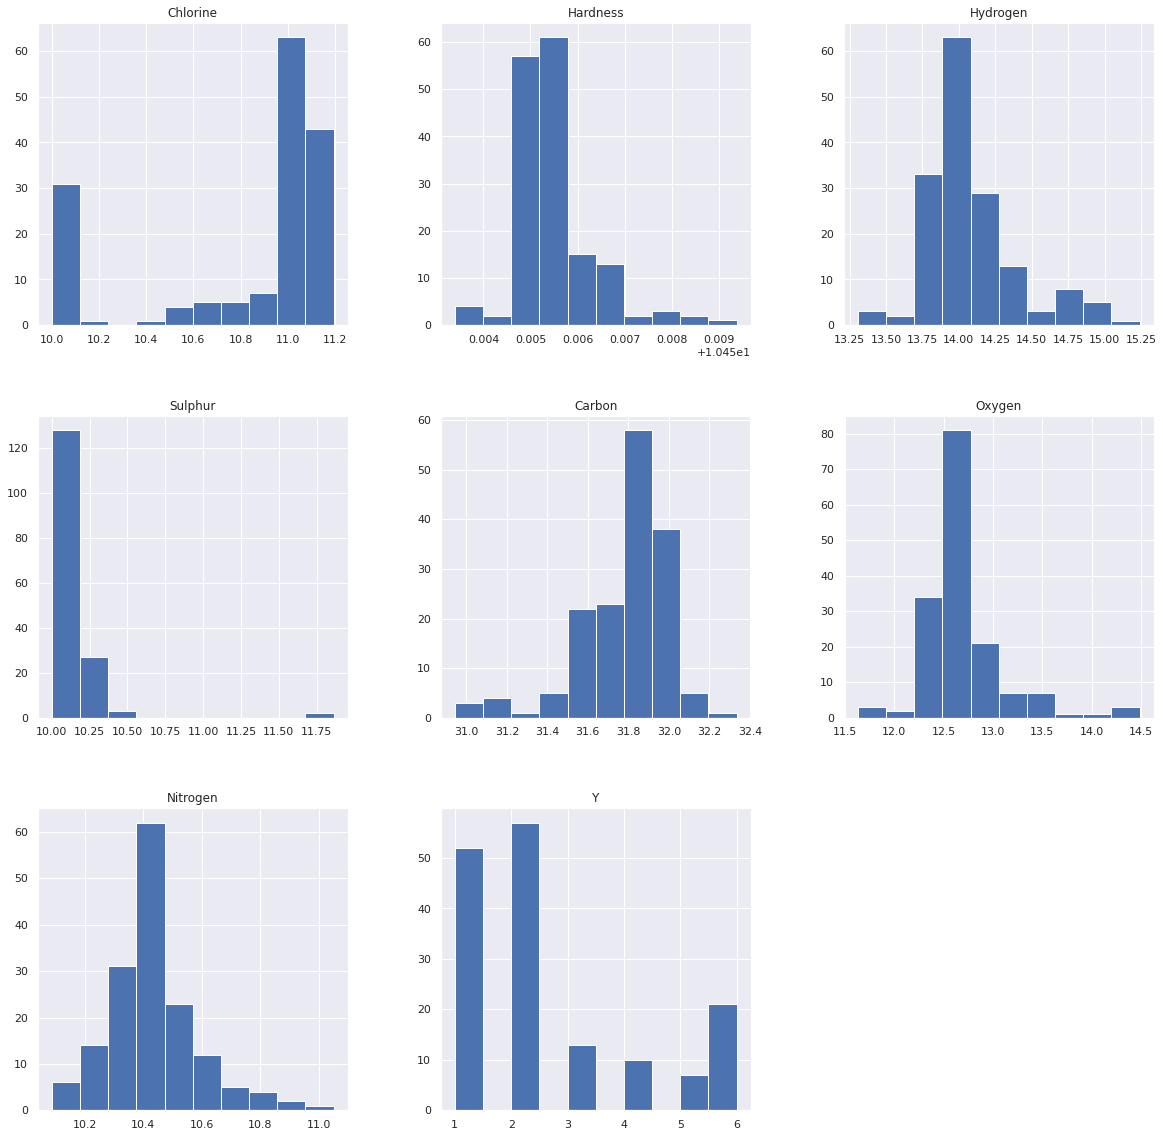

In [ ]:
p = gases_data.hist(figsize = (20,20))

In [ ]:
## observing the shape of the data
gases_data.shape

(160, 8)

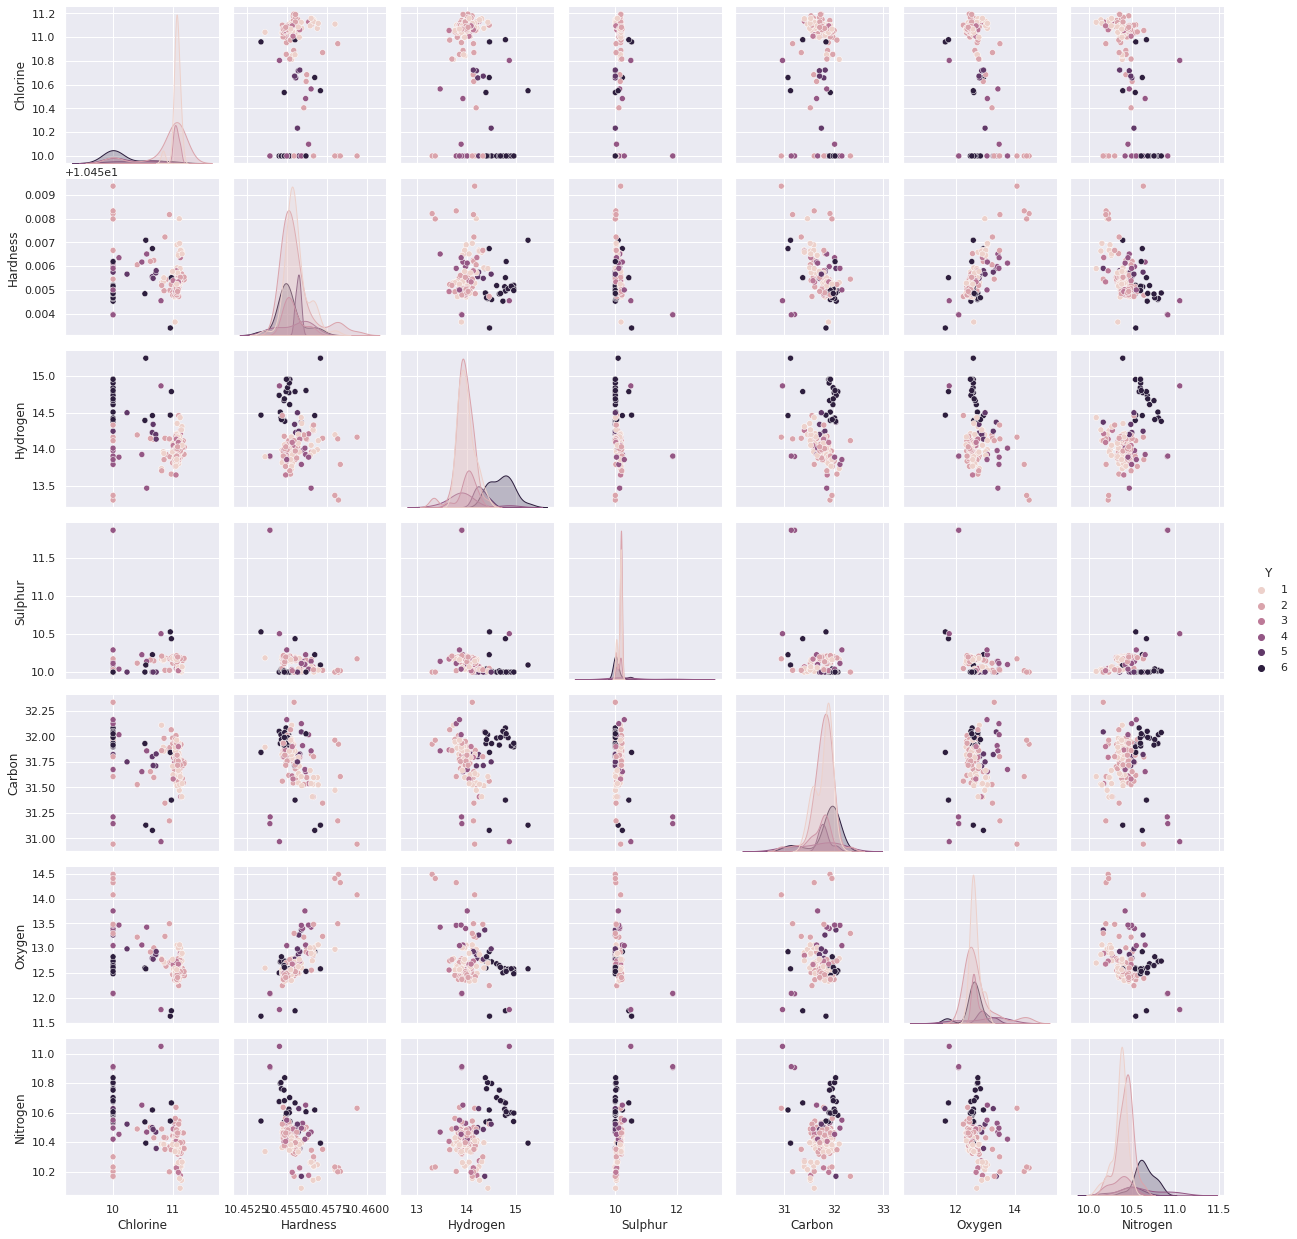

In [ ]:
p=sns.pairplot(gases_data, hue = 'Y')

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(gases_data.drop(["Y"],axis = 1),),
        columns=['Chlorine','Hardness','Hydrogen','Sulphur','Carbon','Oxygen','Nitrogen'])

In [ ]:
X.head()

,Chlorine,Hardness,Hydrogen,Sulphur,Carbon,Oxygen,Nitrogen
0,0.543930,0.252118,-0.120490,0.064738,-0.889708,0.020987,-0.213958
1,-1.916749,-1.792365,-0.589996,8.030348,-2.575239,-1.523649,3.115656
2,0.862122,-0.100988,0.090308,0.050665,-1.078487,-0.456582,0.164861
3,-0.658126,-0.761296,0.981410,-0.709305,0.660981,-0.225259,0.663306
4,-1.916749,3.214675,-2.487180,-0.709305,0.634013,4.468345,-1.410226


In [ ]:
y = gases_data.Y

In [ ]:
#importing train_test_split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=25, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

test_scores = []
train_scores = []

for i in range(1,25):

    knn = KNeighborsClassifier(i)
    knn.fit(X_train,y_train)
    
    train_scores.append(knn.score(X_train,y_train))
    test_scores.append(knn.score(X_test,y_test))

In [ ]:
## score that comes from testing on the same datapoints that were used for training
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
## score that comes from testing on the datapoints that were split in the beginning to be used for testing solely
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 67.5 % and k = [1]


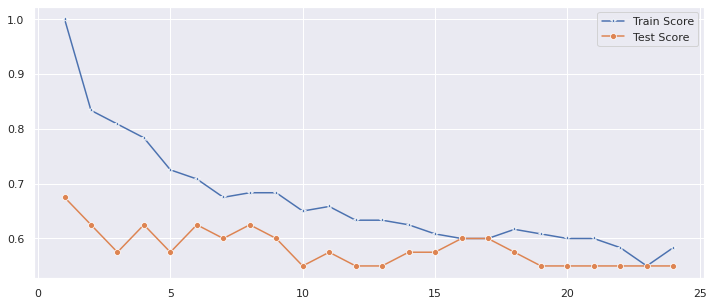

In [ ]:
plt.figure(figsize=(12,5))
p = sns.lineplot(range(1,25),train_scores,marker='*',label='Train Score')
p = sns.lineplot(range(1,25),test_scores,marker='o',label='Test Score')

In [ ]:
#Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(1)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.675

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
#let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,1,2,3,4,5,6,All
True,,,,,,,
1,8,3,2,0,0,0,13
2,0,12,1,0,1,0,14
3,1,0,2,0,0,0,3
4,0,1,0,2,0,0,3
5,0,0,0,0,2,0,2
6,0,3,1,0,0,1,5
All,9,19,6,2,3,1,40


Text(0.5, 12.5, 'Predicted label')

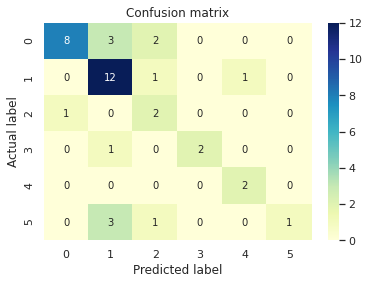

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.89      0.62      0.73        13
           2       0.63      0.86      0.73        14
           3       0.33      0.67      0.44         3
           4       1.00      0.67      0.80         3
           5       0.67      1.00      0.80         2
           6       1.00      0.20      0.33         5

    accuracy                           0.68        40
   macro avg       0.75      0.67      0.64        40
weighted avg       0.77      0.68      0.67        40



In [ ]:
#import GridSearchCV
from sklearn.model_selection import GridSearchCV
#In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,50)}
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

print("Best Score:" + str(knn_cv.best_score_))
print("Best Parameters: " + str(knn_cv.best_params_))

Best Score:0.7125
Best Parameters: {'n_neighbors': 1}
